<a href="https://colab.research.google.com/github/LEE-SANG-HYUK/Titanic/blob/main/titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn 

In [ ]:
path = "/content/drive/MyDrive/train.csv"
train = pd.read_csv(path)

In [ ]:
path = "/content/drive/MyDrive/test.csv"
test = pd.read_csv(path)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic = pd.concat([train, test], axis=0).reset_index(drop=True)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


2.Data cleansing

2.1 Age

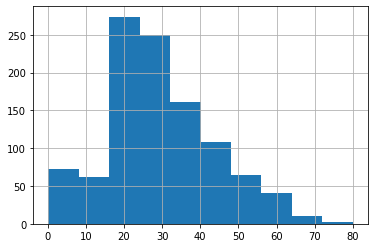

In [ ]:
titanic['Age'].hist()

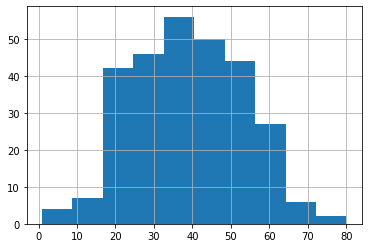

In [ ]:
titanic[titanic['Pclass'] == 1]['Age'].hist()

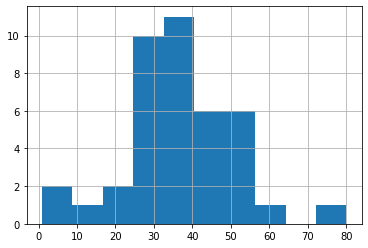

In [ ]:
titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Age'].hist()

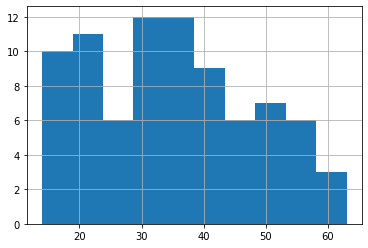

In [ ]:
titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female')  & (titanic['Survived'] == 1)]['Age'].hist()

In [ ]:
print(titanic.groupby(['Pclass', 'Sex', 'Survived'])['Age'].median())

Pclass  Sex     Survived
1       female  0.0         25.0
                1.0         35.0
        male    0.0         45.5
                1.0         36.0
2       female  0.0         32.5
                1.0         28.0
        male    0.0         30.5
                1.0          3.0
3       female  0.0         22.0
                1.0         19.0
        male    0.0         25.0
                1.0         25.0
Name: Age, dtype: float64


In [ ]:
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

2.2 Fare

In [ ]:
titanic.loc[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
Thomas = titanic.loc[(titanic['Pclass'] == 3) & (titanic['SibSp'] == 0) & (titanic['Embarked'] == 'S')]['Fare'].median()
print(Thomas)

7.925


In [ ]:
titanic.loc[titanic['Fare'].isnull(), 'Fare'] = Thomas

2.3 Cabin

In [ ]:
for s in titanic['Cabin']:
  if pd.notnull(s):
    print(s[0])

C
C
E
G
C
D
A
C
B
D
B
C
B
C
F
F
C
E
A
D
D
C
B
E
D
F
D
C
B
F
C
E
B
A
C
F
A
F
B
B
G
A
D
D
C
C
C
D
G
C
B
E
B
C
C
C
D
A
B
D
C
C
B
E
C
C
E
C
B
C
E
C
D
B
C
C
C
E
T
F
C
F
C
E
D
B
E
C
B
D
G
C
E
C
E
B
C
A
C
C
C
E
D
E
E
D
A
B
C
B
C
D
C
B
C
E
D
F
B
B
C
B
B
B
C
C
A
E
C
E
E
C
A
E
B
D
A
C
F
D
D
D
A
B
B
D
A
D
E
C
B
B
D
B
B
C
F
C
E
E
C
C
C
F
C
E
E
B
B
D
C
B
B
D
E
B
B
D
E
F
B
B
D
B
D
B
A
E
B
B
E
B
E
C
C
D
E
D
A
D
B
C
B
C
B
E
B
B
A
C
D
D
A
D
C
C
F
B
B
C
C
D
C
C
C
C
B
C
C
F
A
C
G
C
C
C
B
E
C
C
D
B
C
F
E
E
D
B
E
C
A
B
C
F
C
D
C
E
D
C
C
C
B
F
A
D
B
C
B
C
B
F
F
F
A
C
B
D
E
C
E
E
B
A
C
B
D
C
B
C
D
D
C
C
C


In [ ]:
print(titanic['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B61' 'C5

In [ ]:
print(titanic['Cabin'].nunique())
print(titanic['Cabin'].isnull().sum())

186
1014


In [ ]:
titanic['Deck'] = titanic['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

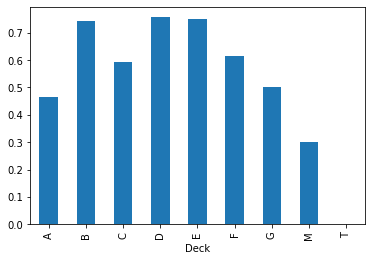

In [ ]:
titanic.groupby(['Deck'])['Survived'].mean().plot(kind='bar')

In [ ]:
titanic[titanic['Deck'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [ ]:
idx = titanic[titanic['Deck'] == 'T'].index
titanic.loc[idx, 'Deck'] = 'A'
titanic['Deck'] = titanic['Deck'].replace(['A', 'B', 'C'], 'ABC')
titanic['Deck'] = titanic['Deck'].replace(['D', 'E'], 'DE')
titanic['Deck'] = titanic['Deck'].replace(['F', 'G'], 'FG')

titanic['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

2.4 Embarked

In [ ]:
titanic.loc[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,ABC
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,ABC


In [ ]:
titanic.loc[(titanic['Pclass'] == 1) & (titanic['Fare'] <= 80) & (titanic['Deck'] == 'ABC')]['Embarked'].value_counts()

S    50
C    42
Name: Embarked, dtype: int64

In [ ]:
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = 'S'

2.5 Conclusion

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Deck         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [ ]:
print(titanic.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Deck              0
dtype: int64


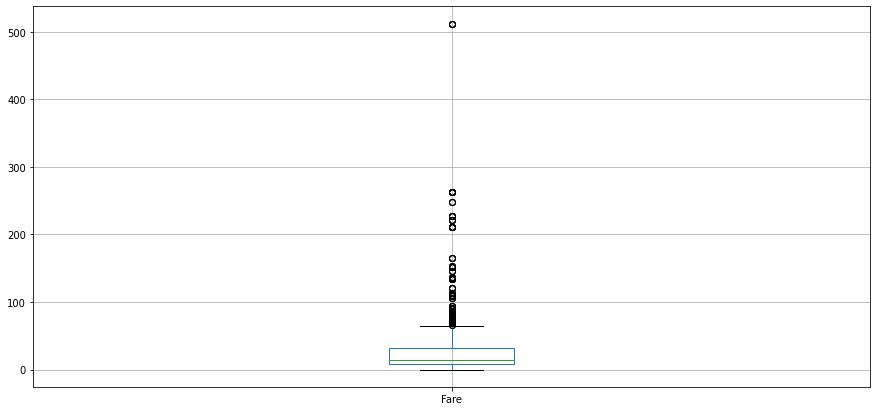

In [ ]:
titanic.boxplot(column=['Fare'], figsize=(15, 7))

In [ ]:
titanic['Fare'].describe()

count    1309.000000
mean       33.276098
std        51.743631
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

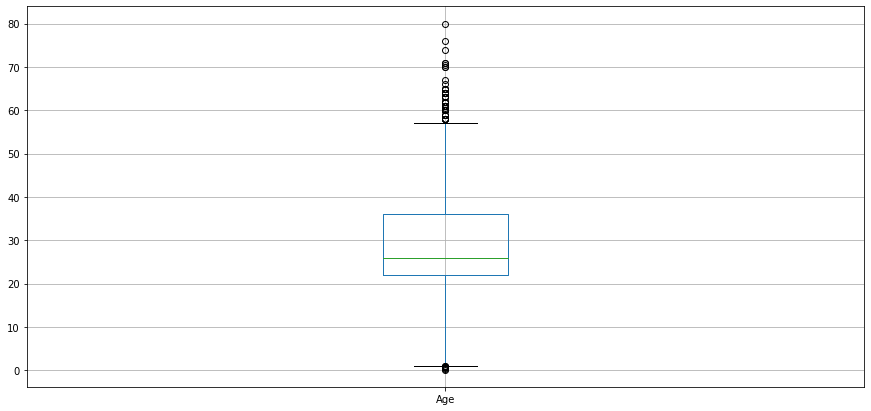

In [ ]:
titanic.boxplot(column=['Age'], figsize=(15, 7))

In [ ]:
titanic['Age'].value_counts()

25.00    178
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
74.00      1
24.50      1
80.00      1
23.50      1
0.67       1
Name: Age, Length: 99, dtype: int64

In [ ]:
titanic['Age'] = pd.cut(titanic['Age'].astype(int), 5)

In [ ]:
titanic['Age'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age, dtype: int64

In [ ]:
titanic['Fare'] = pd.qcut(titanic['Fare'], 5)

In [ ]:
titanic['Fare'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: Fare, dtype: int64

In [ ]:
titanic.groupby(['Age'])['Survived'].mean()

Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [ ]:
titanic.groupby(['Fare'])['Survived'].mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

3.2 Create new features out of existing variables

3.2.1 Family Size

In [ ]:
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch'] + 1

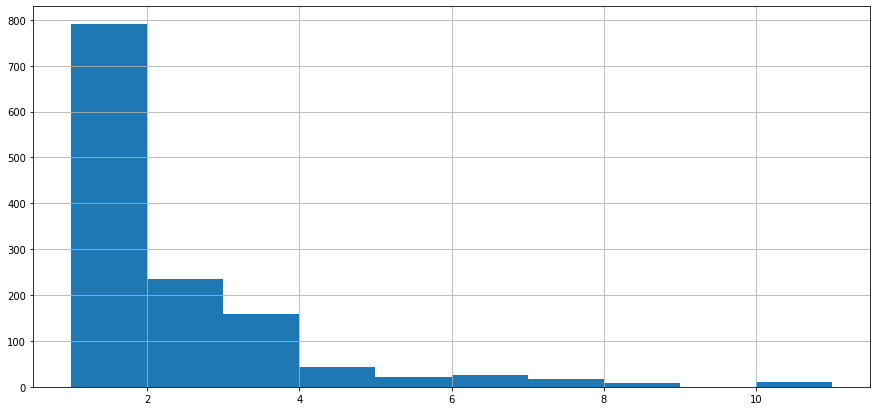

In [ ]:
titanic['Family_size'].hist(figsize=(15, 7), bins=10)

In [ ]:
titanic['Family_size_bin'] = titanic['Family_size'].map(
    lambda s: 1 if s == 1 else(2 if s == 2 else(3 if 3 <= s <= 4 else ( 4 if s >=5 else 0))))

In [ ]:
titanic['Family_size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_size_bin, dtype: int64

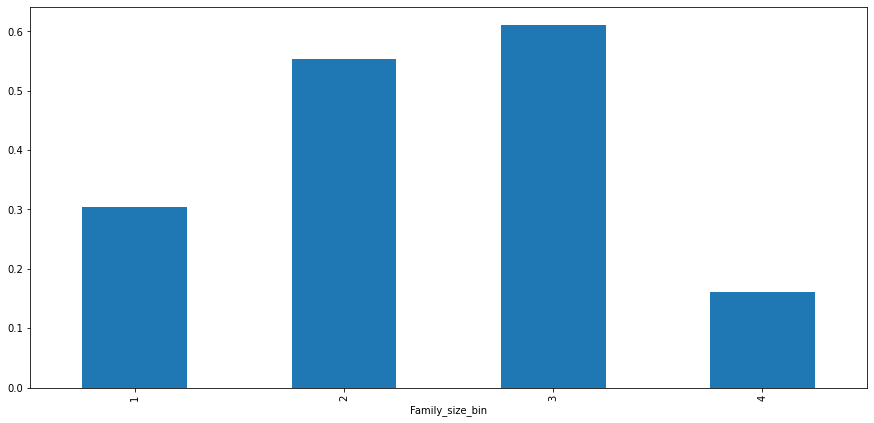

In [ ]:
titanic.groupby(['Family_size_bin'])['Survived'].mean().plot(kind='bar', figsize=(15, 7))

3.2.2 Tickets

In [ ]:
titanic.groupby(['Ticket'])['Ticket'].count()

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: Ticket, Length: 929, dtype: int64

In [ ]:
titanic['Ticket_frequency'] = titanic.groupby(['Ticket'])['Ticket'].transform('count')

In [ ]:
titanic.groupby(['Ticket_frequency'])['Survived'].mean()

Ticket_frequency
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

3.2.3 Title

In [ ]:
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic['is_married'] = 0
titanic['is_married'].loc[titanic['Title'] == 'Mrs'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
titanic['Title'].nunique()

18

In [ ]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
title_names = (titanic['Title'].value_counts() < 10)

In [ ]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Rev              True
Dr               True
Col              True
Ms               True
Major            True
Mlle             True
Dona             True
the Countess     True
Capt             True
Sir              True
Don              True
Jonkheer         True
Lady             True
Mme              True
Name: Title, dtype: bool

In [ ]:
titanic['Title'] = titanic['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [ ]:
titanic.groupby(['Title'])['Title'].count()

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

3.2.4 Survival rates

In [ ]:
titanic.groupby(['Title'])[['Survived', 'Family_size']].mean()

,Survived,Family_size
Title,,
Master,0.575000,4.426230
Misc,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


In [ ]:
import string

def extract_surname(data):
  families = []
  for i in range(len(data)):
    name = data.iloc[i]
    if '(' in name:
      name_no_bracket = name.split('(')[0]
    else:
      name_no_bracket = name
    family = name_no_bracket.split(',')[0]
    title = name_no_bracket.split(',')[1].strip().split(' ')[0]
    for c in string.punctuation:
      family = family.replace(c, '').strip()
    families.append(family)
  return families

titanic['Family'] = extract_surname(titanic['Name'])

In [ ]:
titanic['Family']

0              Braund
1             Cumings
2           Heikkinen
3            Futrelle
4               Allen
            ...      
1304          Spector
1305    Oliva y Ocana
1306          Saether
1307             Ware
1308            Peter
Name: Family, Length: 1309, dtype: object

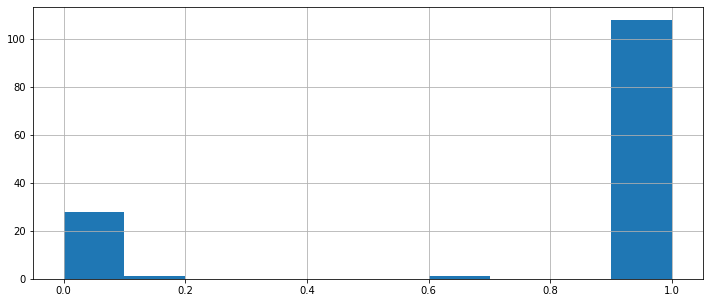

In [ ]:
titanic[(titanic['Sex'] == 'female') & (titanic['Family_size'] > 1)].groupby(['Family'])['Survived'].mean().hist(figsize=(12, 5))

Family
Allen    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

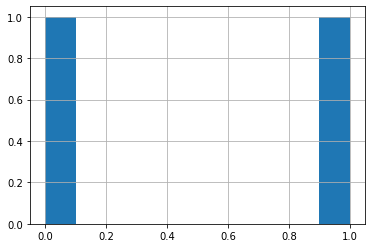

In [ ]:
titanic[titanic['Family']=='Allen'].groupby(['Family'])['Survived'].hist()

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_size,Family_size_bin,Ticket_frequency,Title,is_married,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,"(16.0, 32.0]",1,0,A/5 21171,"(-0.001, 7.854]",NaN,S,M,2,2,1,Mr,0,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(32.0, 48.0]",1,0,PC 17599,"(41.579, 512.329]",C85,C,ABC,2,2,2,Mrs,1,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,"(16.0, 32.0]",0,0,STON/O2. 3101282,"(7.854, 10.5]",NaN,S,M,1,1,1,Miss,0,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(32.0, 48.0]",1,0,113803,"(41.579, 512.329]",C123,S,ABC,2,2,2,Mrs,1,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,"(32.0, 48.0]",0,0,373450,"(7.854, 10.5]",NaN,S,M,1,1,1,Mr,0,Allen


In [ ]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']

for feature in non_numeric_features:
  titanic[feature] = LabelEncoder().fit_transform(titanic[feature])

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_size,Family_size_bin,Ticket_frequency,Title,is_married,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,2,3,2,2,1,3,0,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,4,C85,0,0,2,2,2,4,1,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,2,3,1,1,1,2,0,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,4,C123,2,0,2,2,2,4,1,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,2,3,1,1,1,3,0,Allen


In [ ]:
def divide_df(all):
  return all.loc[:890], all.loc[891:].drop(['Survived'], axis=1)

In [ ]:
titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
titanic = pd.get_dummies(titanic, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family_size_bin', 'Age', 'Fare'])

In [ ]:
titanic_train, titanic_test = divide_df(titanic)

In [ ]:
titanic_train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Cabin,Family_size,Ticket_frequency,is_married,Family,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Deck_0,Deck_1,Deck_2,Deck_3,Family_size_bin_1,Family_size_bin_2,Family_size_bin_3,Family_size_bin_4,Age_0,Age_1,Age_2,Age_3,Age_4,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,1,0.0,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,2,1,0,Braund,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,2,2,1,Cumings,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1.0,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,1,1,0,Heikkinen,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,2,2,1,Futrelle,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",0,0,373450,NaN,1,1,0,Allen,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
titanic_test.head()

,PassengerId,Name,SibSp,Parch,Ticket,Cabin,Family_size,Ticket_frequency,is_married,Family,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Deck_0,Deck_1,Deck_2,Deck_3,Family_size_bin_1,Family_size_bin_2,Family_size_bin_3,Family_size_bin_4,Age_0,Age_1,Age_2,Age_3,Age_4,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
891,892,"Kelly, Mr. James",0,0,330911,NaN,1,1,0,Kelly,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
892,893,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,NaN,2,1,1,Wilkes,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
893,894,"Myles, Mr. Thomas Francis",0,0,240276,NaN,1,1,0,Myles,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
894,895,"Wirz, Mr. Albert",0,0,315154,NaN,1,1,0,Wirz,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
895,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,NaN,3,2,1,Hirvonen,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Family', 'Survived']
drop_cols_2 = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Family']

In [ ]:
X = StandardScaler().fit_transform(titanic_train.drop(columns=drop_cols))
y = titanic_train['Survived'].values

In [ ]:
X_sub = StandardScaler().fit_transform(titanic_test.drop(columns=drop_cols_2))

In [ ]:
X_sub.shape

(418, 36)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(668, 36)

In [ ]:
y

In [ ]:
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = tf.keras.Sequential()

model.add(Dense(16, activation='relu', input_shape=(36, )))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, shuffle=True, epochs=200, batch_size=16, validation_split=0.25)

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 0.7544 - accuracy: 0.5330 - val_loss: 0.6547 - val_accuracy: 0.6287
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7574 - accuracy: 0.5379 - val_loss: 0.6390 - val_accuracy: 0.6527
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7443 - accuracy: 0.5845 - val_loss: 0.6316 - val_accuracy: 0.6527
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.6156 - val_loss: 0.6288 - val_accuracy: 0.6886
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5982 - val_loss: 0.6206 - val_accuracy: 0.6826
Epoch 6/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6346 - accuracy: 0.6650 - val_loss: 0.6083 - val_accuracy: 0.6647
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5956 - val_loss: 0.6058 - val_accuracy: 0.6647
Epoch 8/200
3

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8027


[0.5811254978179932, 0.8026905655860901]

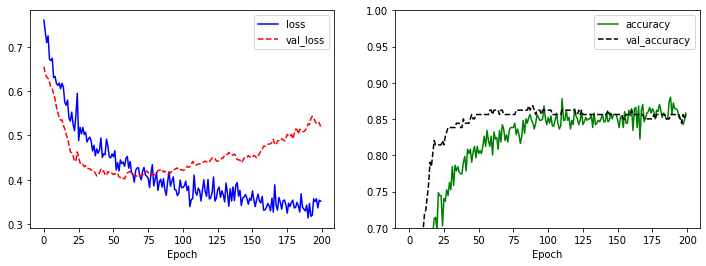

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9191616766467066
0.7937219730941704
